<a href="https://colab.research.google.com/github/deekshithareddygoli/Data-Science-Internship-Project-2/blob/main/Financial_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('/content/Financial Analytics data.csv')

In [12]:
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [18]:
data.drop('Unnamed: 4',axis=1,inplace=True)

In [19]:
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [20]:
data.shape

(488, 4)

In [22]:
data.index

RangeIndex(start=0, stop=488, step=1)

In [23]:
data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [32]:
data.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,459.000000,459.000000,459.000000
mean,246.575163,28870.974139,3807.789412
std,146.046444,60557.081792,9989.449987
min,1.000000,3017.070000,0.000000
25%,117.500000,4942.815000,534.910000
50%,243.000000,10442.090000,1137.170000
75%,371.500000,24707.320000,2730.195000
max,499.000000,583436.720000,110666.930000


In [26]:
data.isnull().sum()

S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
dtype: int64

In [27]:
data.dropna(inplace=True)

In [28]:
data.shape

(459, 4)

In [31]:
data.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [36]:
#Calculating Total Market Capitalization
tot_mar_cap = data['Mar Cap - Crore'].sum()
print('Total Market Capitalization:',tot_mar_cap)

Total Market Capitalization: 13251777.13


In [37]:
#Calculating Total Sales Quarter
tot_sales = data['Sales Qtr - Crore'].sum()
print('Total Quarterly Sales:',tot_sales)

Total Quarterly Sales: 1747775.34


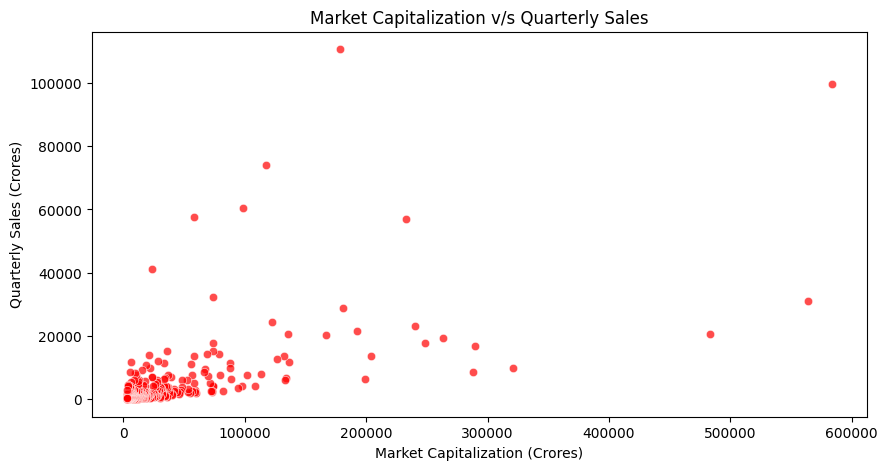

In [40]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=data,x='Mar Cap - Crore',y='Sales Qtr - Crore',color='r',alpha=0.7)
plt.title('Market Capitalization v/s Quarterly Sales')
plt.xlabel('Market Capitalization (Crores)')
plt.ylabel('Quarterly Sales (Crores)')
plt.show()

In [54]:
top_companies = data.groupby('Name')['Mar Cap - Crore'].sum()
top_companies_data = top_companies.sort_values(ascending=False).head(10)
top_companies_data

Name
Reliance Inds.    583436.72
TCS               563709.84
HDFC Bank         482953.59
ITC               320985.27
H D F C           289497.37
Hind. Unilever    288265.26
Maruti Suzuki     263493.81
Infosys           248320.35
O N G C           239981.50
St Bk of India    232763.33
Name: Mar Cap - Crore, dtype: float64

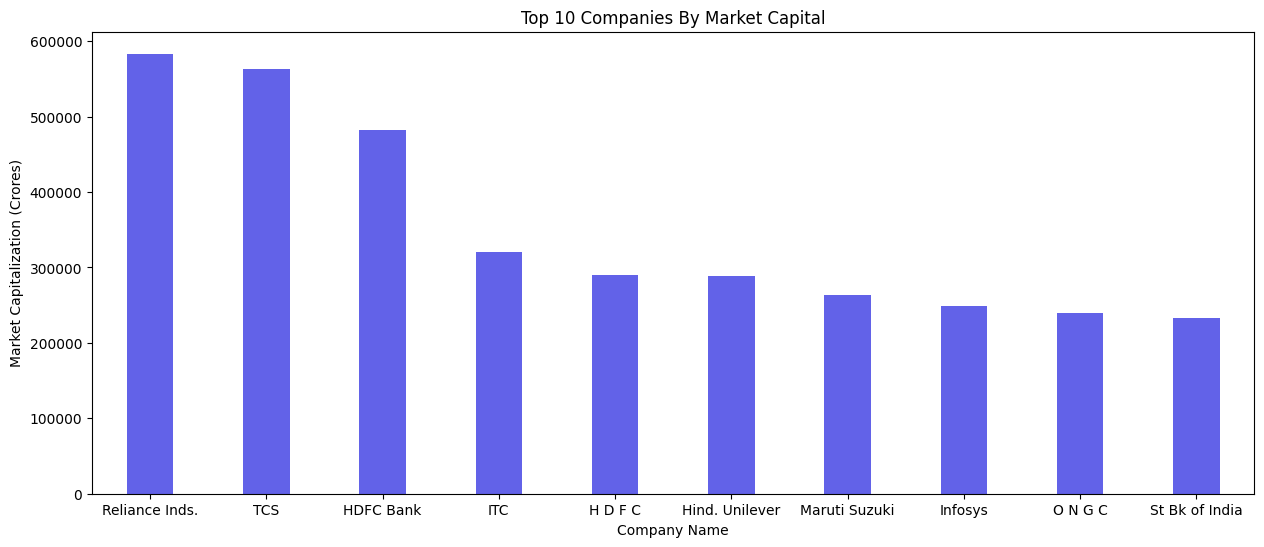

In [57]:
plt.figure(figsize=(15,6))
top_sales = data.groupby('Name')['Mar Cap - Crore'].sum()
top_sales_data = top_sales.sort_values(ascending=False).head(10)

# sns.barplot(x=year_sales.index,y=year_sales.values,color='r',width=0.4,alpha=0.7)

sns.barplot(x=top_sales_data.index, y=top_sales_data.values,color='b',width=0.4,alpha=0.7)
plt.title('Top 10 Companies By Market Capital')
plt.xlabel('Company Name')
plt.ylabel('Market Capitalization (Crores)')
plt.show()

In [65]:
top_sales = data.groupby('Name')['Sales Qtr - Crore'].sum()
top_sales_data = top_sales.sort_values(ascending=False).head(10)
top_sales_data

Name
I O C L            110666.93
Reliance Inds.      99810.00
Tata Motors         74156.07
B P C L             60616.36
H P C L             57474.25
St Bk of India      57014.08
Rajesh Exports      41304.84
Tata Steel          32464.14
TCS                 30904.00
Larsen & Toubro     28747.45
Name: Sales Qtr - Crore, dtype: float64

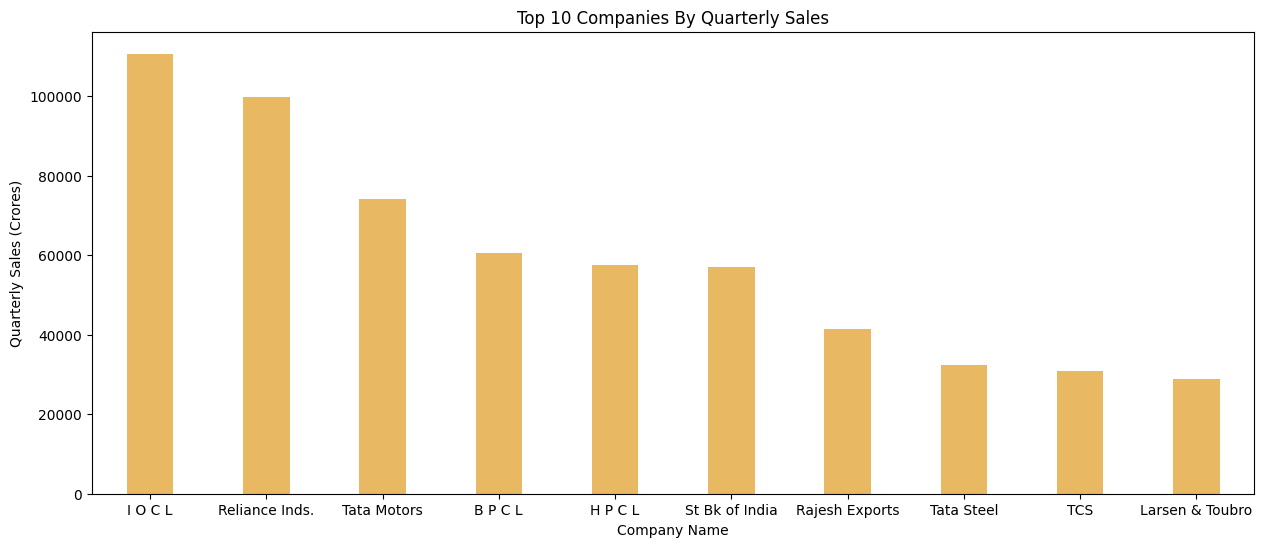

In [56]:
plt.figure(figsize= (15,6))

top_sales = data.groupby('Name')['Sales Qtr - Crore'].sum()
top_sales_data = top_sales.sort_values(ascending=False).head(10)
sns.barplot(x=top_sales_data.index,y=top_sales_data.values,color='orange',width=0.4,alpha=0.7)
plt.title('Top 10 Companies By Quarterly Sales')
plt.xlabel('Company Name')
plt.ylabel('Quarterly Sales (Crores)')
plt.show()

In [66]:
bottom_sales = data.groupby('Name')['Mar Cap - Crore'].sum()
bottom_sales_data = bottom_sales.sort_values(ascending=False).tail(10)
bottom_sales_data

Name
Firstsour.Solu.    3139.94
Kaveri Seed Co.    3125.83
Star Ferro Cem.    3115.98
Deepak Fert.       3079.06
Va Tech Wabag      3041.93
Prime Focus        3031.50
Lak. Vilas Bank    3029.57
NOCIL              3026.26
Orient Cement      3024.32
Natl.Fertilizer    3017.07
Name: Mar Cap - Crore, dtype: float64

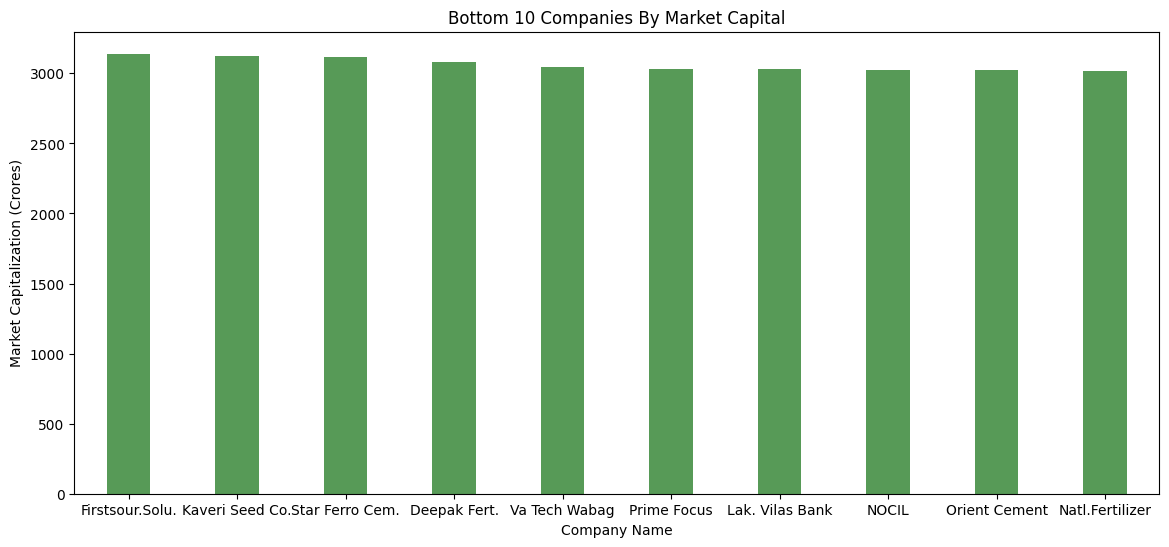

In [61]:
plt.figure(figsize=(14,6))
bottom_sales = data.groupby('Name')['Mar Cap - Crore'].sum()
bottom_sales_data = bottom_sales.sort_values(ascending=False).tail(10)

sns.barplot(x=bottom_sales_data.index, y=bottom_sales_data.values,color='g',width=0.4,alpha=0.7)
plt.title('Bottom 10 Companies By Market Capital')
plt.xlabel('Company Name')
plt.ylabel('Market Capitalization (Crores)')
plt.show()

In [67]:
last_sales = data.groupby('Name')['Sales Qtr - Crore'].sum()
last_sales_data = last_sales.sort_values(ascending=False).tail(10)
last_sales_data

Name
CARE Ratings        74.82
Kaveri Seed Co.     70.64
La Opala RG         69.77
Indian Energy Ex    64.75
Forbes & Co         63.93
Multi Comm. Exc.    60.97
Central Dep. Ser    47.24
Tata Inv.Corpn.     47.02
SPARC               19.42
Ujjivan Fin.Ser.     0.00
Name: Sales Qtr - Crore, dtype: float64

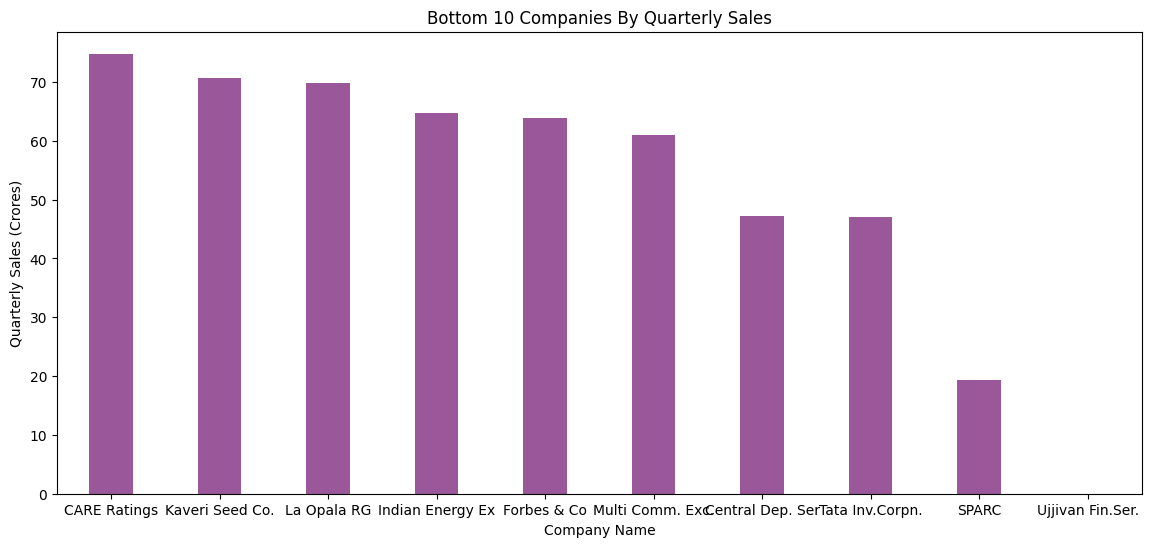

In [63]:
plt.figure(figsize= (14,6))
last_sales = data.groupby('Name')['Sales Qtr - Crore'].sum()
last_sales_data = last_sales.sort_values(ascending=False).tail(10)
sns.barplot(x=last_sales_data.index,y=last_sales_data.values,color='purple',width=0.4,alpha=0.7)
plt.title('Bottom 10 Companies By Quarterly Sales')
plt.xlabel('Company Name')
plt.ylabel('Quarterly Sales (Crores)')
plt.show()